# Demo

In this demo we will show how to use the `PoemGenerator` class to generate poems from images.

In [1]:
from image_to_poem import PoemGenerator
from PIL import Image
import matplotlib.pyplot as plt
import requests
import random
import json
import numpy as np

MODELS_DIR = "../models/"
DATA_DIR = "../data/"

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Setup

In [2]:
# define model
poem_generator = PoemGenerator(lm_model=MODELS_DIR+"language_models/max_len-500", 
                               sim_model=MODELS_DIR+"similarity/model_20231129_221129",
                               n_candidates=5)

Initializing image-to-text model...


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Initializing language model...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Initializing BERT similarity model...


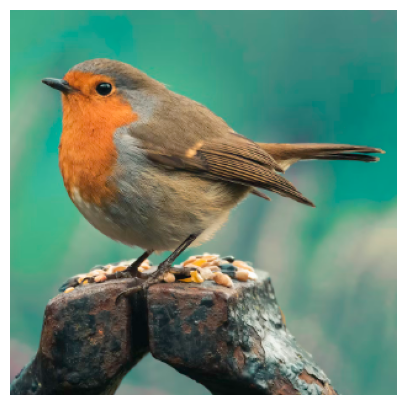

In [14]:
# define image 
img = DATA_DIR + "bird.png"

fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(Image.open(img))
ax.axis('off')

plt.show()

## Image-to-text

In [4]:
desc = poem_generator.image_to_text(img)[0]["generated_text"]
print(desc)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


a bird perched on a rock near a tree 


## Getting candidates

In [5]:
poems = poem_generator.get_candidates(desc, )

In [12]:
for i in range(len(poems)):
    print(f"- - - - - Poem {i+1} - - - - -")
    print(poems[i])
    print()

- - - - - Poem 1 - - - - -
 I said...
i wish i could fly to you and you to me,  you said...
and i think i wish i could fly to your heart and you to mine.

- - - - - Poem 2 - - - - -
  stands  near a tree
on a green and white  branch
the shadow of the tree leaves  the air
the air  a breeze   is  the earth

- - - - - Poem 3 - - - - -
 nests in a dark place where I am lost for you.
We are alone in this room that only now i look down at myself
This dark room i know of which i can’t escape  and so we’ve been looking on the walls
I’m here with you and you’re there to welcome me back
I’m here with you, with your voice so sweet
and your body so

- - - - - Poem 4 - - - - -
  stood  up                                                                                      

- - - - - Poem 5 - - - - -

with the sun shining thru the sky
his legs are a little bowed in the wind
he just sits there in a tree to listen to nature
birds, he says to himself, are so small, yet so large
they're flying through 

## Scoring the poems

In [16]:
print("Similarity scores: ")
for i, poem in enumerate(poems):
    print(f"Poem {i+1}: {poem_generator.sim_model.similarity(desc, poem)}")

Similarity scores: 
Poem 1: 0.38638490438461304
Poem 2: 0.7750892639160156
Poem 3: 0.3656216263771057
Poem 4: 0.34002867341041565
Poem 5: 0.8499623537063599


We can now select the poem with the highest score and print it out.

In [20]:
print("-"*10 + "Chosen poem" + "-"*10)
print(poem_generator.select_poem(poems, desc))

----------Chosen poem----------

with the sun shining thru the sky
his legs are a little bowed in the wind
he just sits there in a tree to listen to nature
birds, he says to himself, are so small, yet so large
they're flying through the air and land
they have wings that could never stretch them,
he is sitting there looking forward to the fall
birds, he says to himself, are so small, but so strong



## Result from the test set

In [31]:
random.seed(1)
test_poems = json.load(open(DATA_DIR+"caption_poem.json"))[-100:]


----------Image----------


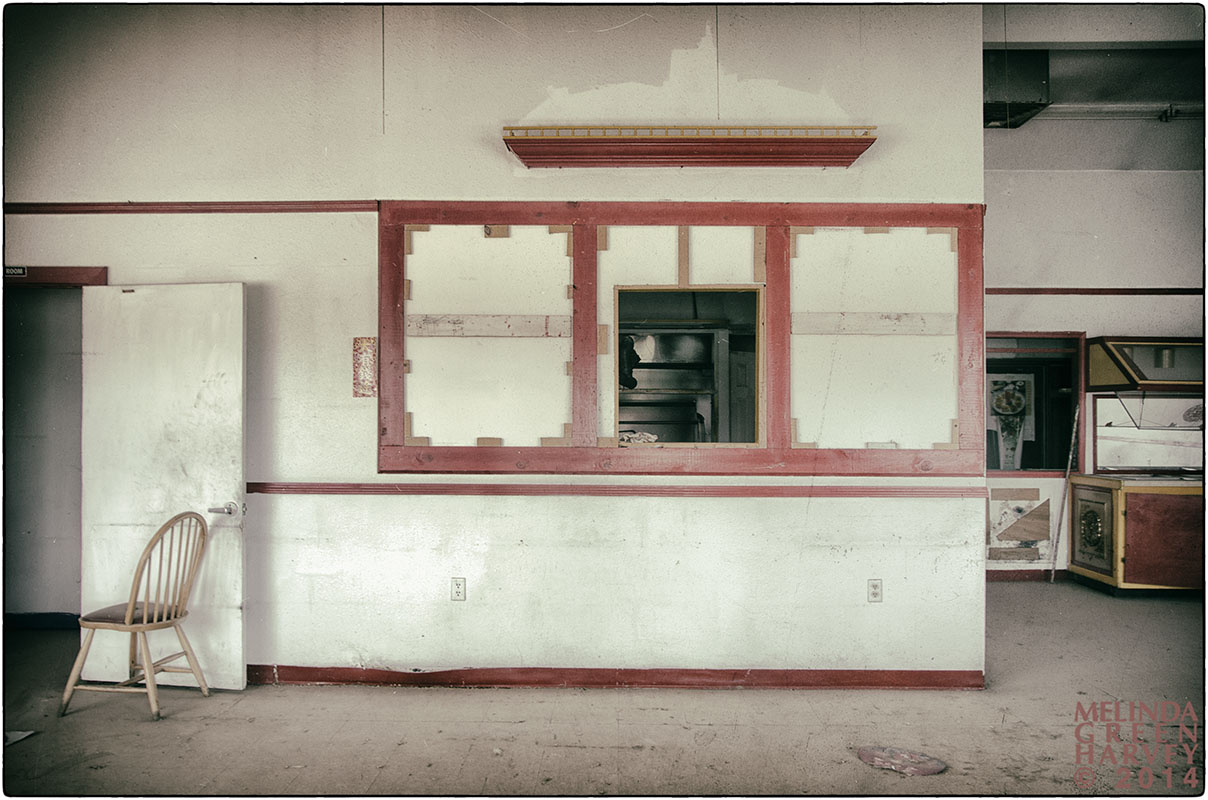

----------Caption----------
a small white and red building with a window 

----------Poem----------
and a little green tree with a big green bell
standing on the ground
where it’s quite long and tall in the air
with a huge and beautiful green crown
that is standing over your head
and I feel a certain connection with you
and when you walk away
it’s you, I mean you, that I admire
and you, with your beautiful green hair
that was hanging from your hair,

----------Candidate poems----------
Poem 1)
and a little green tree with a big green bell
standing on the ground
where it’s quite long and tall in the air
with a huge and beautiful green crown
that is standing over your head
and I feel a certain connection with you
and when you walk away
it’s you, I mean you, that I admire
and you, with your beautiful green hair
that was hanging from your hair,

Similarity score 1: 0.7829159498214722

Poem 2)
a room,
a window to a mirror, a place for laughter to float through
a mirror in which there is a m

In [33]:
def show_test_result(test_poem):
    url = test_poem["image_url"]
    
    # generate poem
    caption = poem_generator.image_to_text(url)[0]["generated_text"]
    
    # show image
    print("-"*10 + "Image" + "-"*10)
    r = requests.get(url, stream=True)
    display(Image.open(r.raw))

    # print caption 
    print("-"*10 + "Caption" + "-"*10)
    print(caption)
    print()
    
    # get candidates
    candidates = poem_generator.get_candidates(caption)
    
    # get similarity scores
    sim_scores = [poem_generator.sim_model.similarity(caption, candidate) for candidate in candidates]
    
    
    # print poem
    print("-"*10 + "Poem" + "-"*10)
    print(candidates[np.argmax(sim_scores)])
    print()
    
    # print candidate poems
    print("-"*10 + "Candidate poems" + "-"*10)
    for i, candidate in enumerate(candidates):
        print(f"Poem {i+1})")
        print(candidate)
        print()
        print(f"Similarity score {i+1}: {sim_scores[i]}")
        print()
    

idx = random.randint(0, len(test_poems)-1)

show_test_result(test_poems[idx])

## Getting poem for online images

In [10]:
url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.bzAmsVmGOL7JgLOVVcpZmAHaEK%26pid%3DApi&f=1&ipt=f52b325b8edbbc2c059a792b92a5c5192eb279bce3b2a65e6d2bf78d70ae690d&ipo=images"
poem = poem_generator.image_to_poem(url)

----------Image----------


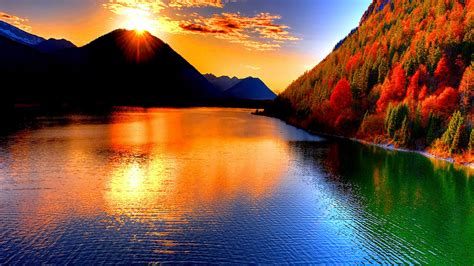

----------Caption----------
a sunset view of a lake with mountains 

----------Poem----------
in it.
The sky above the lake glows red.
A man has seen the blue sea as he sees the blue sea.
He sees its sunset too and his heart has not bled.
A woman has loved to watch the blue sea.
But all of their souls have gone from the blue sea.
The sunset can never be seen by the blinds.
But the blue sea is a great place for heart to

----------Similarity score----------
0.8763018250465393



In [11]:
# show image
print("-"*10 + "Image" + "-"*10)
try:
    r = requests.get(url, stream=True)
    display(Image.open(r.raw))
except:
    pass

# print caption 
print("-"*10 + "Caption" + "-"*10)
print(poem[0]["image_desc"])
print()

# print poem
print("-"*10 + "Poem" + "-"*10)
print(poem[0]["generated_poem"])
print()

# print similarity score
print("-"*10 + "Similarity score" + "-"*10)
print(poem_generator.sim_model.similarity(poem[0]["image_desc"], poem[0]["generated_poem"]))
print()
